# Uncalibrated photometric stereo constrained by intrinsic reﬂectance image and shape from silhoutte

In [32]:
import cv2
import numpy as np
from pathlib import Path
from tenpy.linalg.svd_robust import svd
import sys

In [33]:
# read in the images from folder dataset/PhotometricStereo/PSData/cat/Objects
images = []

folder_path = Path("./Dataset/PSData/cat/Objects")

for img_path in folder_path.glob('*.png'):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
    images.append(img)

images = np.array(images)  # shape: (n_images, width, height)

In [34]:
n_images,width, height = images.shape
print(n_images, width, height)

20 640 500


In [35]:
linearized_images = []
for image in images:
    linearized_image, _, _ = np.linalg.svd(image, compute_uv=True, full_matrices=False)
    linearized_images.append(linearized_image)

# convert to numpy array
linearized_images = np.array(linearized_images)
linearized_images[0].shape

(640, 500)

## 3.2 Estimate of the Albedo

In [36]:
# Calculate the average image
average_image = np.mean(linearized_images, axis=0)
# apply the bilateral filter to the average image
# parameters are the standard values from OpenCV: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
albedo_estimate = cv2.bilateralFilter(average_image.astype(np.float32), d=9, sigmaColor=75, sigmaSpace=75)

In [37]:
average_image.shape

(640, 500)

In [38]:
albedo_estimate
# reshape to width x height
albedo_estimate = albedo_estimate.reshape((width, height, -1))

(-0.5, 499.5, 639.5, -0.5)

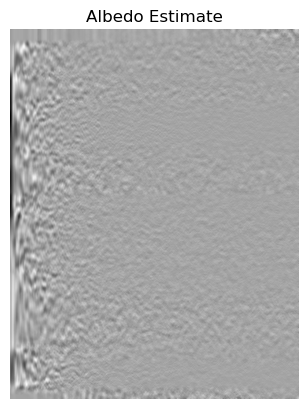

In [39]:
# plot the albedo estimate
import matplotlib.pyplot as plt
plt.imshow(albedo_estimate, cmap='gray')
plt.title('Albedo Estimate')
plt.axis('off')


## 3.3 Singular value decomposition

## 3.4 Constant albedo constraint

## 3.5 Constraint using guide normal

## Final output 